In [1]:
#pip install pycaret[full]

In [2]:
#pip install streamlit

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt  
import missingno as msn

In [4]:
data = pd.read_csv('insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
#Charges is the target variable as we will be predicting the patient charges using demographic and basic patient health risk metrics as covariates!

#The objective is to build a web application that supports online as well as batch prediction using trained machine learning model and pipeline.

In [6]:
#EDA

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [8]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
data.shape

(1338, 7)

In [11]:
data.nunique()                  #Checking unique values in each column

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [12]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


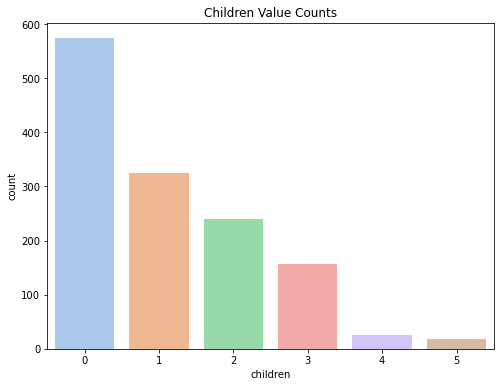

In [14]:
# Data Visualization

sns.set_palette('pastel')
plt.figure(figsize=(8,6))
sns.countplot(x='children',data=data)
plt.title('Children Value Counts')
plt.show()

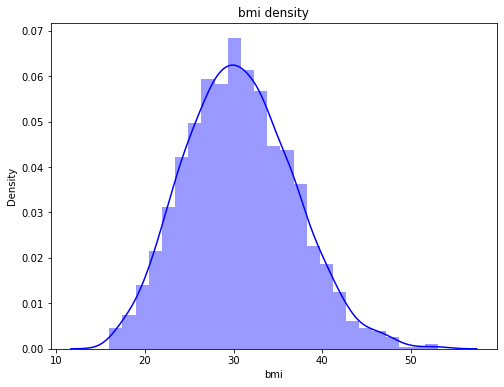

In [15]:
#BMI frequency density curve

plt.figure(figsize=(8,6))
sns.distplot(data.bmi,color='blue')
plt.title('bmi density')
plt.show()

In [16]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [17]:
data.groupby('sex')['age'].mean()       # Grouping age by sex and finding average age of each sex

sex
female    39.503021
male      38.917160
Name: age, dtype: float64

In [18]:
data.groupby('sex')['age','charges'].mean()

,age,charges
sex,,
female,39.503021,12569.578844
male,38.917160,13956.751178


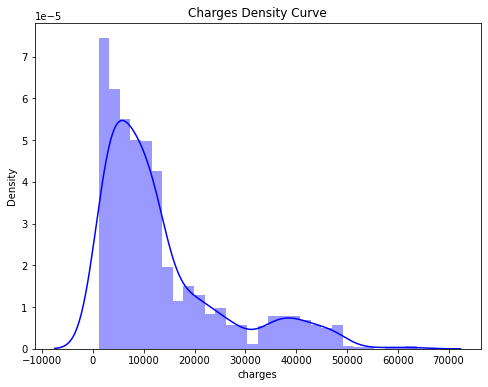

In [19]:
plt.figure(figsize=(8,6))
sns.distplot(data.charges,color='blue')
plt.title('Charges Density Curve')
plt.show()

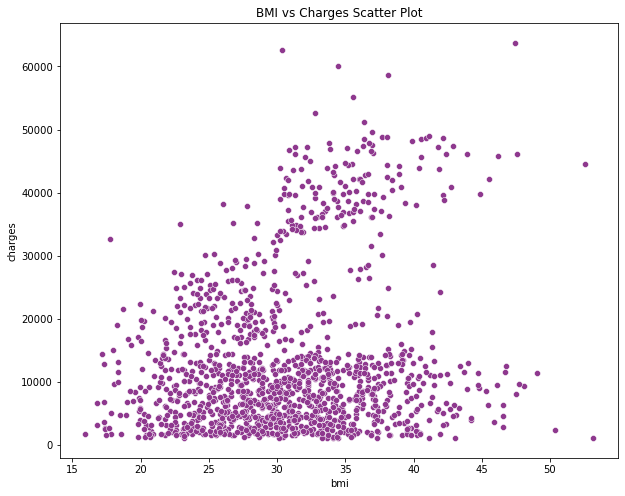

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='bmi',y='charges',data=data,color='#8E388E')
plt.title('BMI vs Charges Scatter Plot')
plt.show()

In [21]:
#People with abnormarly high BMI tend to experience higher charges.

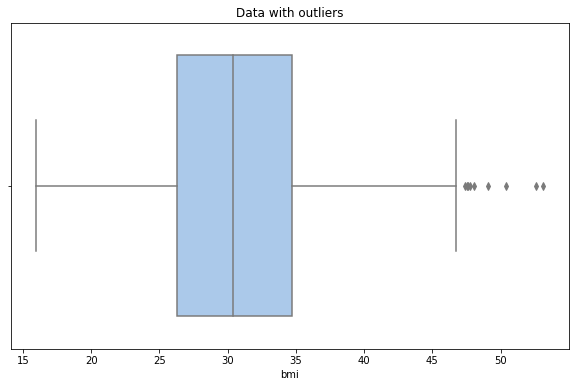

In [22]:
#Finding outliers

plt.figure(figsize=(10,6))
sns.boxplot(data.bmi)
plt.title('Data with outliers')
plt.show()


In [23]:
data.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [24]:
import pycaret
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
#Model Training and Validation

from pycaret.regression import *

r2 = setup(data, target = 'charges', session_id = 123)
            

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Data shape,"(1338, 10)"
4,Train data shape,"(936, 10)"
5,Test data shape,"(402, 10)"
6,Ordinal features,2
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [26]:
r2

In [27]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [28]:
lr = create_model ('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4222.9616,33775764.3432,5811.6920,0.7983,0.4879,0.4328
1,4522.5819,43620030.5192,6604.5462,0.7464,0.5473,0.4216
2,3853.0378,31981107.9602,5655.1842,0.5951,0.7108,0.4398
3,3707.7705,26513348.5760,5149.1114,0.7786,0.4891,0.5164
4,4484.2122,43828444.1000,6620.3054,0.6740,0.5761,0.3847
5,4113.6222,35882341.9810,5990.1871,0.7692,0.5464,0.4130
6,4098.0868,39631320.0598,6295.3411,0.7303,0.5745,0.4266
7,4833.7747,45739275.7172,6763.0818,0.7485,0.5887,0.3967
8,4621.0616,40681916.3737,6378.2377,0.7372,0.7032,0.5225


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9919,23548657.1177,4832.9329,0.8320,0.4447,0.3137,0.0600
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.1320
catboost,CatBoost Regressor,2899.3783,25762701.9552,5057.5721,0.8163,0.4815,0.3522,0.7510
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.2630
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.1160
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.0360
xgboost,Extreme Gradient Boosting,3443.6091,32824626.4000,5711.2140,0.7626,0.6224,0.4469,0.0950
llar,Lasso Least Angle Regression,4298.6038,38369142.0849,6174.9424,0.7309,0.5786,0.4424,0.0360
ridge,Ridge Regression,4317.6984,38396435.9578,6177.2329,0.7306,0.5891,0.4459,0.0320
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.0290


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [30]:
# The BEST model based on Mean Absolute Error (MAE) is gbr (Gradient Boosting Regressor). Note the lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model.

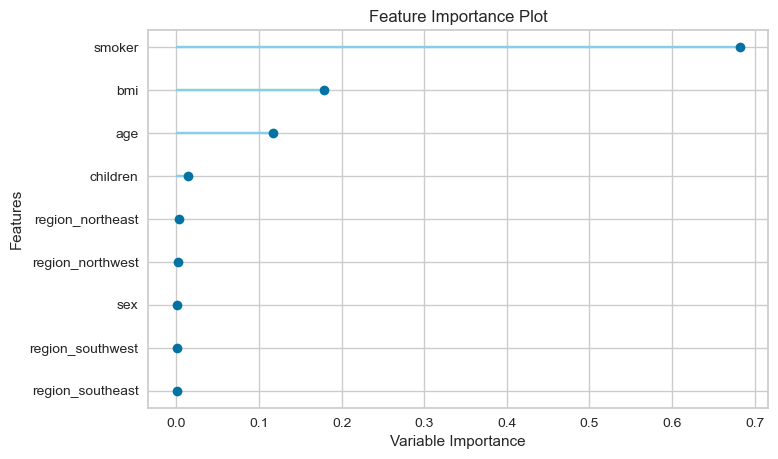

In [31]:
plot_model(best, plot = 'feature')

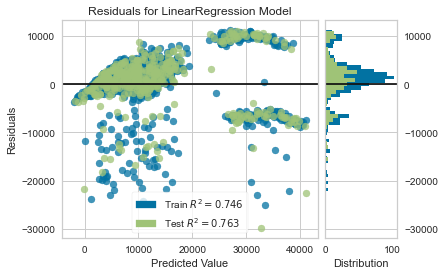

In [32]:
plot_model(lr)

In [33]:
#Saving transformation pipeline and model

save_model(lr, model_name= 'deployment_insurance_charges')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\user\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(fill_value='constant',
                                                               strategy='constant'))),
                 ('ordinal_encoding',...
                                                                                      'male': 1}},
                                                                         {'col': 'smoker',
                                                                          'mapping': {nan: -1,
                                                                                      'no': 0,
                                    

In [34]:
#Training and model selection is completed, the final ML pipeline and linear regression model is saved as a pickle file which will be used in web application to generate predictions on new datapoints

In [35]:
from pycaret import show_versions; show_versions()


System:
    python: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\user\anaconda3\python.exe
   machine: Windows-10-10.0.22000-SP0

PyCaret required dependencies:
                 pip: 22.2.2
          setuptools: 61.2.0
             pycaret: 3.0.0.rc3
             IPython: 8.2.0
          ipywidgets: 7.6.5
                tqdm: 4.64.0
               numpy: 1.21.5
              pandas: 1.4.2
              jinja2: 2.11.3
               scipy: 1.7.3
              joblib: 1.1.0
             sklearn: 1.0.2
                pyod: Installed but version unavailable
            imblearn: 0.9.1
   category_encoders: 2.5.0
            lightgbm: 3.3.2
               numba: 0.55.1
            requests: 2.27.1
          matplotlib: 3.5.1
          scikitplot: 0.3.7
         yellowbrick: 1.4
              plotly: 5.6.0
             kaleido: 0.2.1
         statsmodels: 0.13.2
              sktime: 0.11.4
               tbats: Installed but version unavailable
  

Building Front End web Application ....